In [8]:
import torch
from torch.nn import DataParallel
from torchvision.utils import make_grid
import tqdm.notebook as nb
from unet import ScoreNet
import matplotlib.pyplot as plt
import math
import numpy as np
from utils import gen_geometric_progression
import visualize


In [59]:
def min_max_normalize(tensor):
    min_val = tensor.min()
    max_val = tensor.max()
    normalized_tensor = (tensor - min_val) / (max_val - min_val)
    return normalized_tensor

In [2]:
def langevin_sampling(shape, model, eps=0.0001, device=torch.device('cpu')) -> torch.Tensor:
    with torch.no_grad():
        x = torch.randn(shape, device=device)
        for i in nb.trange(10000):
            noise = torch.randn(shape, device=device)
            s = model(x)
            x = x + eps * s + math.sqrt(2 * eps) * noise
        return x


In [28]:
def annealed_langevin_sampling(shape, model, rs: torch.Tensor, T, eps=5e-7, device=torch.device('cpu')) -> torch.Tensor:
    with torch.no_grad():
        x = torch.randn(shape, device=device)
        for r in rs:
            a = eps * (r / rs[-1]) ** 2
            for i in nb.trange(T, leave=False, desc=f'r = {r}'):
                noise = torch.randn(shape, device=device)
                s = model(x, r.repeat(x.shape[0]))
                x = x + a * .5 * s + math.sqrt(a) * noise
        return x


In [64]:
device = torch.device('cuda')
model = DataParallel(ScoreNet(source_channels=4))
model.load_state_dict(torch.load('sanity_check.pt', weights_only=True))

batch = 25
rs = gen_geometric_progression(.5, .01, 50).to(device)
samples = annealed_langevin_sampling((batch, 4, 10, 10), model, rs, 40, device=device).clamp(0.0, 1.0)


r = 0.5:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.46237102150917053:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.42757391929626465:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.39539557695388794:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.3656389117240906:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.3381216824054718:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.3126753270626068:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.28914403915405273:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.2673836350440979:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.2472608983516693:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.22865253686904907:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.21144461631774902:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.1955317258834839:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.1808164119720459:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.16720853745937347:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.15462476015090942:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.14298802614212036:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.13222703337669373:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.12227589637041092:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.11307366192340851:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.10456397384405136:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.0966947004199028:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.08941765129566193:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.08268826454877853:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.07646531611680984:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.070710688829422:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.06538914889097214:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.060468096286058426:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.05591738969087601:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.05170916020870209:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.04781763628125191:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.04421897977590561:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.040891148149967194:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.037813764065504074:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.03496797755360603:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.03233635798096657:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.029902789741754532:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.02765236794948578:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.02557130716741085:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.02364686317741871:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.02186724729835987:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.020221563056111336:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.018699729815125465:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.017292426899075508:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.015991033986210823:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.014787580817937851:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.01367469783872366:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.012645568698644638:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.01169388834387064:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.01081383042037487:   0%|          | 0/40 [00:00<?, ?it/s]

r = 0.01000000350177288:   0%|          | 0/40 [00:00<?, ?it/s]

/tmp/ipykernel_672959/2595935242.py:1: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  sample = np.array(min_max_normalize(samples[0].reshape(4, 100).permute(1,0).cpu()))


(100, 4)


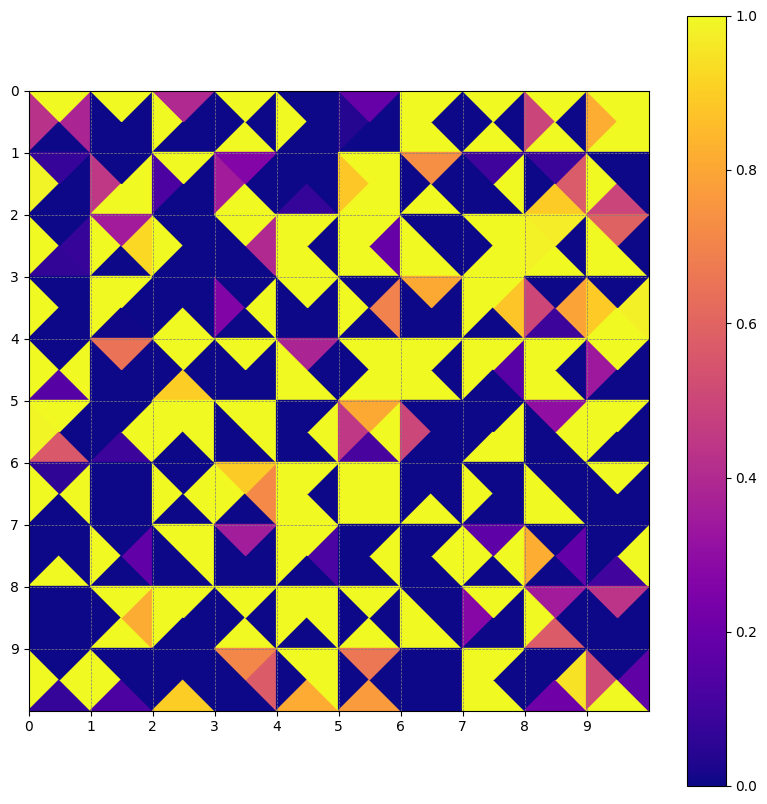

In [65]:

sample = np.array(min_max_normalize(samples[0].reshape(4, 100).permute(1,0).cpu()))
print(sample.shape)
visualize.visualize_value_map(sample, 10)
